# Kaggle: Ames Housing Prices Analysis

In [1]:
#######################################
### Import Data Processing Packages ###
#######################################

import pandas            as pd;
import numpy             as np;
import seaborn           as sns;
import matplotlib.pyplot as plt;

%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from scipy import stats;

########################################
### Import Machine Learning Packages ###
########################################

from sklearn.preprocessing   import StandardScaler;
from sklearn.preprocessing   import PolynomialFeatures;

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV;
from sklearn.metrics         import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error;

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis;

from sklearn.linear_model    import LinearRegression;
from sklearn.linear_model    import LogisticRegression, LogisticRegressionCV;
from sklearn.linear_model    import Ridge, RidgeCV;
from sklearn.linear_model    import Lasso, LassoCV;
from sklearn.linear_model    import ElasticNet, ElasticNetCV;

from sklearn.neighbors       import KNeighborsClassifier;
from sklearn.tree            import DecisionTreeClassifier;
from sklearn.ensemble        import RandomForestClassifier;
from sklearn.svm             import SVC;
from sklearn.cluster         import KMeans;
from sklearn.decomposition   import PCA;

from sklearn.ensemble        import RandomForestRegressor;
from sklearn.ensemble        import GradientBoostingRegressor;
from sklearn.ensemble        import AdaBoostRegressor;

from sklearn.neural_network  import MLPClassifier;

from sklearn.pipeline import Pipeline;

import xgboost as xgb;

########################
### Import Data Sets ###
########################

#from sklearn                 import datasets;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
# Read CSV File

train_df = pd.read_csv('train.csv')

test_df  = pd.read_csv('test.csv')

In [3]:
# Check Head of Data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [148]:
train_df[['LandContour', 'SalePrice']].groupby(['LandContour'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,LandContour,SalePrice
1,HLS,231533
2,Low,203661
3,Lvl,180183
0,Bnk,143104


In [149]:
train_df[['LotConfig', 'SalePrice']].groupby(['LotConfig'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,LotConfig,SalePrice
1,CulDSac,223854
3,FR3,208475
0,Corner,181623
2,FR2,177934
4,Inside,176938


In [150]:
train_df[['Heating', 'SalePrice']].groupby(['Heating'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Heating,SalePrice
1,GasA,182021
2,GasW,166632
4,OthW,125750
5,Wall,92100
3,Grav,75271
0,Floor,72500


In [ ]:
train_df[['GarageType', 'SalePrice']].groupby(['GarageType'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

In [40]:
# Check column sizes and data types
#train_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
Street          1460 non-null object
ExterQual       1460 non-null object
ExterCond       1460 non-null object
CentralAir      1460 non-null object
HeatingQC       1460 non-null object
PavedDrive      1460 non-null object
1stFlrSF        1460 non-null float64
KitchenQual     1460 non-null object
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
SalePrice       1460 non-null float64
dtypes: float64(2), int64(5), object(7)
memory usage: 159.8+ KB


In [ ]:
train_df['MasVnrType'].dropna()

In [ ]:
print(stats.mode(train_df['MasVnrType'].values))

In [ ]:
#####################
### Preprocessing ###
#####################

train_df = pd.read_csv('train.csv')

# Drop Heavy NaN columns
train_df = train_df.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Fill NaN with Median/Mode
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(np.median(train_df['LotFrontage'].dropna()))
train_df['MasVnrType'] = train_df['MasVnrType'].fillna(stats.mode(train_df['MasVnrType'].dropna()))
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(np.median(train_df['MasVnrArea'].dropna()))

In [21]:
# Check for null entries
print(train_df.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
                 ...  
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
GarageType        True
GarageYrBlt       True
GarageFinis

In [15]:
# Check dimensions of dataframe
train_df.shape

(1460, 81)

In [16]:
# Inspect statistics of data
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:
print(df['OverallCond'].unique())

[5 8 6 7 4 2 3 9 1]


In [3]:
# Define New Dataset
df = train_df[['OverallQual', 'OverallCond', 'YearBuilt', 'Street', 'ExterQual', 'ExterCond', 'CentralAir', 'HeatingQC',
               'MSZoning', 'Utilities', 'LotShape', 'PavedDrive', '1stFlrSF', 'KitchenQual', 'FullBath', 'TotRmsAbvGrd', 
               'SalePrice', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
               'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Electrical', 'Functional', 'GarageType',
               'SaleCondition', 'SaleType', 'MiscFeature', 'MSSubClass', 'LotConfig', 'Heating', 'LandContour', 'LotFrontage',
               'LotArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF']]

# Create Dummy Variables
df = pd.concat([df, pd.get_dummies(df['LandContour'])], axis=1)
df = df.drop('LandContour', axis=1)

df = pd.concat([df, pd.get_dummies(df['Heating'])], axis=1)
df = df.drop('Heating', axis=1)

df = pd.concat([df, pd.get_dummies(df['LotConfig'])], axis=1)
df = df.drop('LotConfig', axis=1)

df = pd.concat([df, pd.get_dummies(df['MSSubClass'])], axis=1)
df = df.drop('MSSubClass', axis=1)

df = pd.concat([df, pd.get_dummies(df['MiscFeature'])], axis=1)
df = df.drop('MiscFeature', axis=1)

df = pd.concat([df, pd.get_dummies(df['SaleType'])], axis=1)
df = df.drop('SaleType', axis=1)

df = pd.concat([df, pd.get_dummies(df['SaleCondition'])], axis=1)
df = df.drop('SaleCondition', axis=1)

df = pd.concat([df, pd.get_dummies(df['RoofMatl'])], axis=1)
df = df.drop('RoofMatl', axis=1)

df = pd.concat([df, pd.get_dummies(df['Exterior1st'])], axis=1)
df = df.drop('Exterior1st', axis=1)

df = pd.concat([df, pd.get_dummies(df['Exterior2nd'])], axis=1)
df = df.drop('Exterior2nd', axis=1)

df = pd.concat([df, pd.get_dummies(df['MasVnrType'])], axis=1)
df = df.drop('MasVnrType', axis=1)

df = pd.concat([df, pd.get_dummies(df['Foundation'])], axis=1)
df = df.drop('Foundation', axis=1)

df = pd.concat([df, pd.get_dummies(df['Electrical'])], axis=1)
df = df.drop('Electrical', axis=1)

df = pd.concat([df, pd.get_dummies(df['Functional'])], axis=1)
df = df.drop('Functional', axis=1)

df = pd.concat([df, pd.get_dummies(df['GarageType'])], axis=1)
df = df.drop('GarageType', axis=1)

df = pd.concat([df, pd.get_dummies(df['MSZoning'])], axis=1)
df = df.drop('MSZoning', axis=1)

df = pd.concat([df, pd.get_dummies(df['Neighborhood'])], axis=1)
df = df.drop('Neighborhood', axis=1)

df = pd.concat([df, pd.get_dummies(df['Condition1'])], axis=1)
df = df.drop('Condition1', axis=1)

df = pd.concat([df, pd.get_dummies(df['Condition2'])], axis=1)
df = df.drop('Condition2', axis=1)

df = pd.concat([df, pd.get_dummies(df['BldgType'])], axis=1)
df = df.drop('BldgType', axis=1)

df = pd.concat([df, pd.get_dummies(df['HouseStyle'])], axis=1)
df = df.drop('HouseStyle', axis=1)

df = pd.concat([df, pd.get_dummies(df['RoofStyle'])], axis=1)
df = df.drop('RoofStyle', axis=1)

# Convert Ordinal Data
df.loc[df['PavedDrive'] =='N', 'PavedDrive'] = 0;
df.loc[df['PavedDrive'] =='P', 'PavedDrive'] = 1;
df.loc[df['PavedDrive'] =='Y', 'PavedDrive'] = 2;

df.loc[df['Street'] =='Grvl', 'Street'] = 0;
df.loc[df['Street'] =='Pave', 'Street'] = 1;

df.loc[df['CentralAir'] =='N', 'CentralAir'] = 0;
df.loc[df['CentralAir'] =='Y', 'CentralAir'] = 1;

df.loc[df['LotShape'] =='Reg', 'LotShape'] = 3;
df.loc[df['LotShape'] =='IR1', 'LotShape'] = 2;
df.loc[df['LotShape'] =='IR2', 'LotShape'] = 1;
df.loc[df['LotShape'] =='IR3', 'LotShape'] = 0;

df.loc[df['LandSlope'] =='Gtl', 'LandSlope'] = 2;
df.loc[df['LandSlope'] =='Mod', 'LandSlope'] = 1;
df.loc[df['LandSlope'] =='Sev', 'LandSlope'] = 0;

df.loc[df['Utilities'] =='AllPub', 'Utilities'] = 3;
df.loc[df['Utilities'] =='NoSewr', 'Utilities'] = 2;
df.loc[df['Utilities'] =='NoSeWa', 'Utilities'] = 1;
df.loc[df['Utilities'] =='ELO',    'Utilities'] = 0;

df.loc[df['ExterQual'] =='Po', 'ExterQual'] = 0;
df.loc[df['ExterQual'] =='Fa', 'ExterQual'] = 1;
df.loc[df['ExterQual'] =='TA', 'ExterQual'] = 2;
df.loc[df['ExterQual'] =='Gd', 'ExterQual'] = 3;
df.loc[df['ExterQual'] =='Ex', 'ExterQual'] = 4;

df.loc[df['ExterCond'] =='Po', 'ExterCond'] = 0;
df.loc[df['ExterCond'] =='Fa', 'ExterCond'] = 1;
df.loc[df['ExterCond'] =='TA', 'ExterCond'] = 2;
df.loc[df['ExterCond'] =='Gd', 'ExterCond'] = 3;
df.loc[df['ExterCond'] =='Ex', 'ExterCond'] = 4;

df.loc[df['KitchenQual'] =='Po', 'KitchenQual'] = 0;
df.loc[df['KitchenQual'] =='Fa', 'KitchenQual'] = 1;
df.loc[df['KitchenQual'] =='TA', 'KitchenQual'] = 2;
df.loc[df['KitchenQual'] =='Gd', 'KitchenQual'] = 3;
df.loc[df['KitchenQual'] =='Ex', 'KitchenQual'] = 4;

df.loc[df['HeatingQC'] =='Po', 'HeatingQC'] = 0;
df.loc[df['HeatingQC'] =='Fa', 'HeatingQC'] = 1;
df.loc[df['HeatingQC'] =='TA', 'HeatingQC'] = 2;
df.loc[df['HeatingQC'] =='Gd', 'HeatingQC'] = 3;
df.loc[df['HeatingQC'] =='Ex', 'HeatingQC'] = 4;

df.loc[df['BsmtQual'] =='NA', 'BsmtQual'] = 0;
df.loc[df['BsmtQual'] =='Po', 'BsmtQual'] = 1;
df.loc[df['BsmtQual'] =='Fa', 'BsmtQual'] = 2;
df.loc[df['BsmtQual'] =='TA', 'BsmtQual'] = 3;
df.loc[df['BsmtQual'] =='Gd', 'BsmtQual'] = 4;
df.loc[df['BsmtQual'] =='Ex', 'BsmtQual'] = 5;

df.loc[df['BsmtCond'] =='NA', 'BsmtCond'] = 0;
df.loc[df['BsmtCond'] =='Po', 'BsmtCond'] = 1;
df.loc[df['BsmtCond'] =='Fa', 'BsmtCond'] = 2;
df.loc[df['BsmtCond'] =='TA', 'BsmtCond'] = 3;
df.loc[df['BsmtCond'] =='Gd', 'BsmtCond'] = 4;
df.loc[df['BsmtCond'] =='Ex', 'BsmtCond'] = 5;

df.loc[df['BsmtExposure'] =='NA', 'BsmtExposure'] = 0;
df.loc[df['BsmtExposure'] =='No', 'BsmtExposure'] = 1;
df.loc[df['BsmtExposure'] =='Mn', 'BsmtExposure'] = 2;
df.loc[df['BsmtExposure'] =='Av', 'BsmtExposure'] = 3;
df.loc[df['BsmtExposure'] =='Gd', 'BsmtExposure'] = 4;

# Fill in Missing Values
df['LotFrontage'] = df['LotFrontage'].fillna(np.median(df['LotFrontage'].dropna()))
df['LotArea']     = df['LotArea'].fillna(np.median(df['LotArea'].dropna()))
df['BsmtUnfSF']   = df['BsmtUnfSF'].fillna(np.median(df['BsmtUnfSF'].dropna()))
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(np.median(df['TotalBsmtSF'].dropna()))

df['BsmtQual']     = df['BsmtQual'].fillna(stats.mode(df['BsmtQual'].values)[0][0])
df['BsmtCond']     = df['BsmtCond'].fillna(stats.mode(df['BsmtCond'].values)[0][0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(stats.mode(df['BsmtExposure'].values)[0][0])

# Correct Skew
df['SalePrice']   = np.log(df['SalePrice'] + 1)
df['1stFlrSF']    = np.log(df['1stFlrSF'] + 1)
df['BsmtUnfSF']   = np.log(df['BsmtUnfSF'] + 1)
df['TotalBsmtSF'] = np.log(df['TotalBsmtSF'] + 1)
df['LotFrontage'] = np.log(df['LotFrontage'] + 1)
df['LotArea']     = np.log(df['LotArea'] + 1)

df.describe()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning:

numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.



,OverallQual,OverallCond,YearBuilt,1stFlrSF,FullBath,TotRmsAbvGrd,SalePrice,LotFrontage,LotArea,BsmtQual,...,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1971.267808,7.008452,1.565068,6.517808,12.024057,4.214451,9.110966,3.565068,...,0.007534,0.304795,0.025342,0.044521,0.008904,0.781507,0.007534,0.195890,0.004795,0.001370
std,1.382997,1.112799,30.202904,0.317431,0.550916,1.625393,0.399449,0.314395,0.517369,0.678071,...,0.086502,0.460478,0.157217,0.206319,0.093973,0.413365,0.086502,0.397021,0.069100,0.036999
min,1.000000,1.000000,1872.000000,5.814131,0.000000,2.000000,10.460271,3.091042,7.170888,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,1954.000000,6.783325,1.000000,5.000000,11.775105,4.110874,8.929898,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,5.000000,1973.000000,6.992096,2.000000,6.000000,12.001512,4.248495,9.156887,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,6.000000,2000.000000,7.238676,2.000000,7.000000,12.273736,4.382027,9.358976,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,9.000000,2010.000000,8.453827,3.000000,14.000000,13.534474,5.749393,12.279537,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [152]:
df.head()

,OverallQual,OverallCond,YearBuilt,Street,ExterQual,ExterCond,CentralAir,HeatingQC,Utilities,LotShape,...,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed
0,7,5,2003,1,3,2,1,4,3,3,...,0,1,0,0,0,1,0,0,0,0
1,6,8,1976,1,2,2,1,4,3,3,...,0,0,0,0,0,1,0,0,0,0
2,7,5,2001,1,3,2,1,4,3,2,...,0,1,0,0,0,1,0,0,0,0
3,7,5,1915,1,2,2,1,3,3,2,...,0,1,0,0,0,1,0,0,0,0
4,8,5,2000,1,3,2,1,4,3,2,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
sns.pairplot(data=df, x_vars=df.columns.values[:-1], y_vars="SalePrice", palette='plasma', diag_kind="kde", diag_kws=dict(shade=True))

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('corr()')

In [ ]:
data = [
    go.Heatmap(
        z = df.corr(method='pearson').values,
        x = df.columns.values,
        y = df.columns.values,
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']],
        text = True ,
        opacity = 1.0,
        zmin = -1,
        zmax = 1
    )
]


layout = go.Layout(
    title='Pearson Correlation of all Nutritional metrics',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [32]:
stats.skew(df['YearRemodAdd'].values)

-0.5030444967597948

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



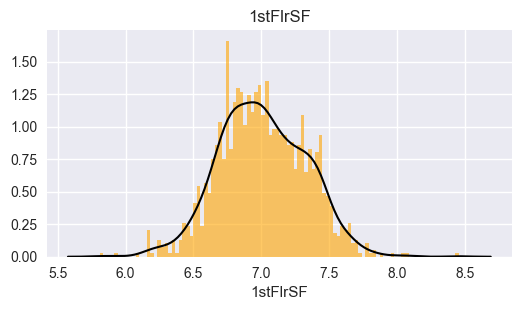

In [10]:
fig  = plt.figure(figsize=(6, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.distplot(np.log(df['1stFlrSF']), bins=100, ax=axes1, axlabel='1stFlrSF', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("1stFlrSF")
#axes2.set_title("Cross Validation")

In [ ]:
fig  = plt.figure(figsize=(6, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.distplot(df['YearBuilt'], bins=100, ax=axes1, axlabel='Year Built', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Year Built")
#axes2.set_title("Cross Validation")

In [ ]:
fig  = plt.figure(figsize=(6, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.distplot(df['YearBuilt'], bins=100, ax=axes1, axlabel='Year Built', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Year Built")
#axes2.set_title("Cross Validation")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



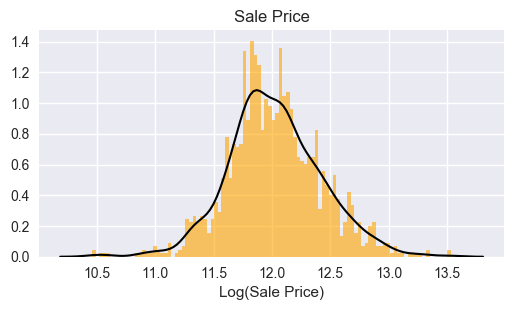

In [59]:
fig  = plt.figure(figsize=(6, 3), dpi=100);

axes1 = fig.add_subplot(111); 

sns.distplot(df['SalePrice'], bins=100, ax=axes1, axlabel='Log(Sale Price)', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Sale Price")
#axes2.set_title("Cross Validation")

# Scaling and Train/Test/Split

In [4]:
# Scale features to mean = 1, std = 1

train_scaler = StandardScaler();

train_scaler.fit(df.drop('SalePrice', axis=1));

scaled_train = train_scaler.transform(df.drop('SalePrice', axis=1));

df_feat = pd.DataFrame(scaled_train, columns=df.columns[:-1])
df_feat.describe()

,OverallQual,OverallCond,YearBuilt,Street,ExterQual,ExterCond,CentralAir,HeatingQC,Utilities,LotShape,...,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-7.680310e-17,3.692632e-16,1.032983e-15,6.229606e-16,-3.604423e-16,5.491422e-16,2.494960e-16,9.516741e-17,9.441886e-16,5.151131e-16,...,2.059236e-16,-1.838712e-16,-4.604384e-17,-3.674002e-16,1.359833e-16,1.915515e-16,2.214363e-16,-4.643166e-16,5.208733e-16,-5.293330e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.556706e+01,-2.431510e+00,-5.937195e+00,-3.790570e+00,-3.279083e+00,-3.819686e+01,-4.452492e+00,...,-8.712888e-02,-6.621357e-01,-1.612495e-01,-2.158587e-01,-9.478452e-02,-1.891244e+00,-8.712888e-02,-4.935702e-01,-6.940907e-02,-3.703704e-02
25%,-7.951515e-01,-5.171998e-01,-5.719226e-01,6.423821e-02,-6.896039e-01,-2.381124e-01,2.638126e-01,-1.193952e+00,2.618016e-02,-1.016637e+00,...,-8.712888e-02,-6.621357e-01,-1.612495e-01,-2.158587e-01,-9.478452e-02,5.287526e-01,-8.712888e-02,-4.935702e-01,-6.940907e-02,-3.703704e-02
50%,-7.183611e-02,-5.171998e-01,5.737148e-02,6.423821e-02,-6.896039e-01,-2.381124e-01,2.638126e-01,8.911794e-01,2.618016e-02,7.012910e-01,...,-8.712888e-02,-6.621357e-01,-1.612495e-01,-2.158587e-01,-9.478452e-02,5.287526e-01,-8.712888e-02,-4.935702e-01,-6.940907e-02,-3.703704e-02
75%,6.514792e-01,3.817427e-01,9.516316e-01,6.423821e-02,1.052302e+00,-2.381124e-01,2.638126e-01,8.911794e-01,2.618016e-02,7.012910e-01,...,-8.712888e-02,1.510265e+00,-1.612495e-01,-2.158587e-01,-9.478452e-02,5.287526e-01,-8.712888e-02,-4.935702e-01,-6.940907e-02,-3.703704e-02
max,2.821425e+00,3.078570e+00,1.282839e+00,6.423821e-02,2.794208e+00,5.460970e+00,2.638126e-01,8.911794e-01,2.618016e-02,7.012910e-01,...,1.147725e+01,1.510265e+00,6.201569e+00,4.632660e+00,1.055025e+01,5.287526e-01,1.147725e+01,2.026054e+00,1.440734e+01,2.700000e+01


In [5]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.1);
X_train, X_test, y_train, y_test = train_test_split(scaled_train, df['SalePrice'], test_size=0.1);

# Linear Regression

Linear regression without regularization. Fails due to outliers.

Accuracy: -51746993915280516970446848.00 (+/- 178796937137970215819149312.00)


Train Test Split
MAE: 5497797397.1
MSE: 4.41296332789e+21
RMSE: 66430138701.4


Cross Validation
MAE: 211150982080.0
MSE: 7.3638640116e+24
RMSE: 2.71364404659e+12


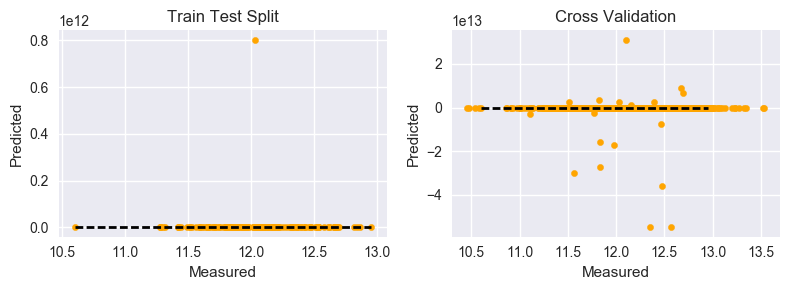

In [115]:
lr = LinearRegression();

lr.fit(X_train, y_train);

pred1 = lr.predict(X_test);
#pred2 = cross_val_predict(lr, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(lr, scaled_train, df['SalePrice'], cv=10)

#scores = cross_val_score(lr, df.drop('SalePrice', axis=1), df['SalePrice'],  cv=10)
scores = cross_val_score(lr, scaled_train, df['SalePrice'],  cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print('\n')
print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))

print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



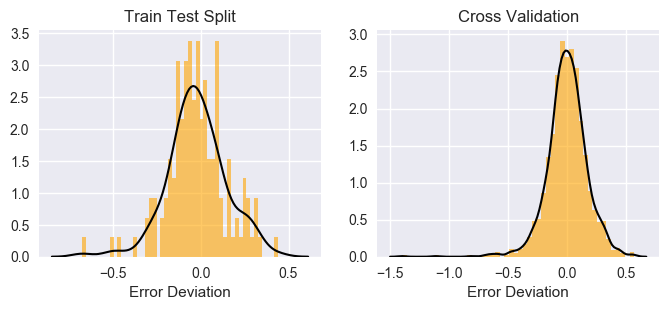

In [53]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [23]:
coeffecients = pd.DataFrame(lr.coef_, df.drop('SalePrice', axis=1).columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
OverallQual,29559.312117
OverallCond,6374.896755
YearBuilt,8609.291990
Street,-1876.380286
ExterQual,9670.708738
ExterCond,-325.332499
CentralAir,-82.835778
HeatingQC,709.680270
PavedDrive,1174.422332
1stFlrSF,17647.398980


In [37]:
param_grid = [{'fit_intercept': [True, False],
              'normalize':     [True, False]}]

grid = GridSearchCV(lr, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

[ 0.73480814  0.73480814  0.70443527  0.70443527]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

# Ridge Regression (L2 Regularization)

Train Test Split
MAE: 0.095390107871
MSE: 0.0158391591067
RMSE: 0.125853721068


Cross Validation
MAE: 0.0943352984784
MSE: 0.0195901855252
RMSE: 0.139964943915


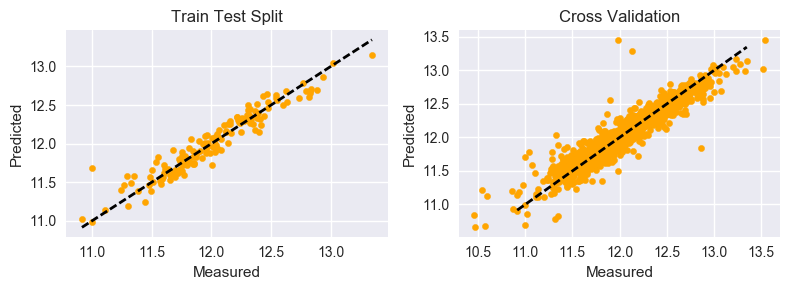

In [13]:
ridge = Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

ridge.fit(X_train, y_train);

pred1 = ridge.predict(X_test);
#pred2 = cross_val_predict(ridge, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(ridge, scaled_train, df['SalePrice'], cv=10)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



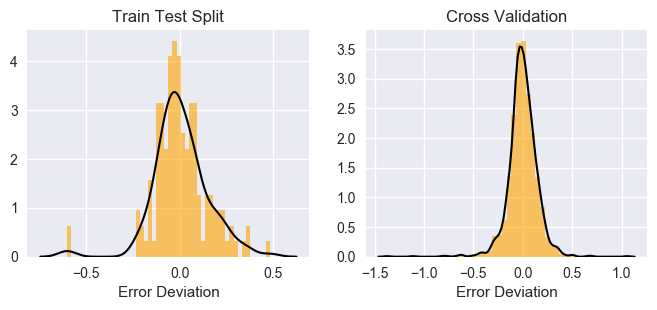

In [117]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [121]:
param_grid = [{'alpha': [0.01, 0.1, 1, 10, 50, 100, 250, 500, 1000, 10000]}]
               
grid = GridSearchCV(ridge, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

[ 0.84111989  0.84116238  0.84156544  0.84442393  0.84996927  0.85208424
  0.85108487  0.84397502  0.8254984   0.54916503]


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge picked 205 variables and eliminated the other 0 variables


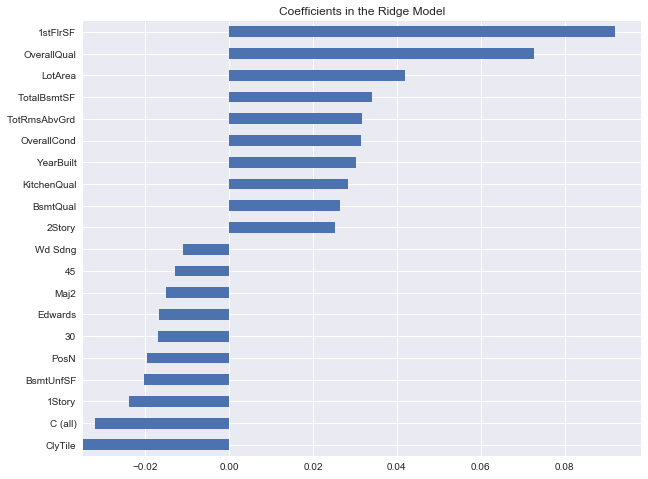

In [20]:
coef = pd.Series(ridge.coef_, index = df.drop('SalePrice', axis=1).columns)

print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (10.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

# Lasso (L1 Regularization)

Train Test Split
MAE: 0.0944189951853
MSE: 0.0151021479994
RMSE: 0.122890797049


Cross Validation
MAE: 0.092383385329
MSE: 0.0195521855565
RMSE: 0.139829129857


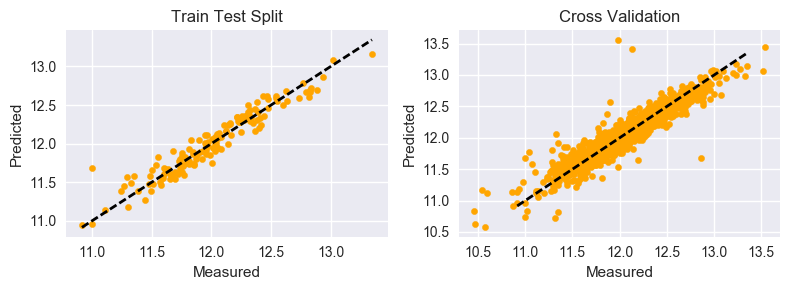

In [8]:
lasso = Lasso(alpha=0.001);
#lasso = LassoCV();

lasso.fit(X_train, y_train);

pred1 = lasso.predict(X_test);
#pred2 = cross_val_predict(lasso, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(lasso, scaled_train, df['SalePrice'], cv=10)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



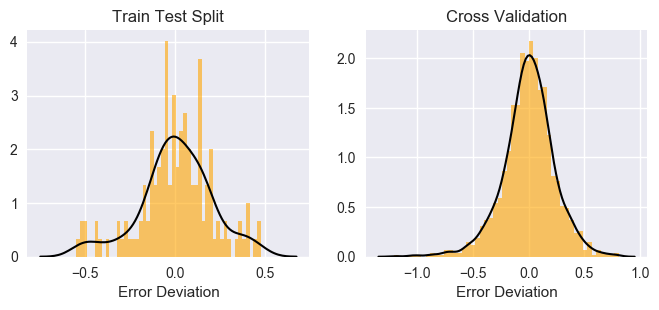

In [67]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [129]:
param_grid = [{'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}]

grid = GridSearchCV(lasso, param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small a

[ 0.84174547  0.84369112  0.85335115  0.84812108  0.66481337 -0.00418339
 -0.00418339]


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Lasso picked 146 variables and eliminated the other 59 variables


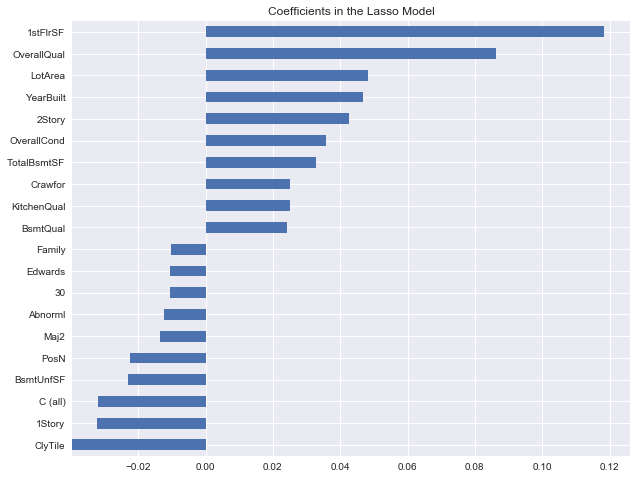

In [21]:
coef = pd.Series(lasso.coef_, index = df.drop('SalePrice', axis=1).columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (10, 8)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# Polynomial + XGBoost

Transformation into a polynomial features. Followed with XGBoost regression.

Train Test Split
MAE: 0.0956083435164
MSE: 0.0180538216569
RMSE: 0.134364510407


Cross Validation
MAE: 0.098469349448
MSE: 0.0199616156124
RMSE: 0.141285581757


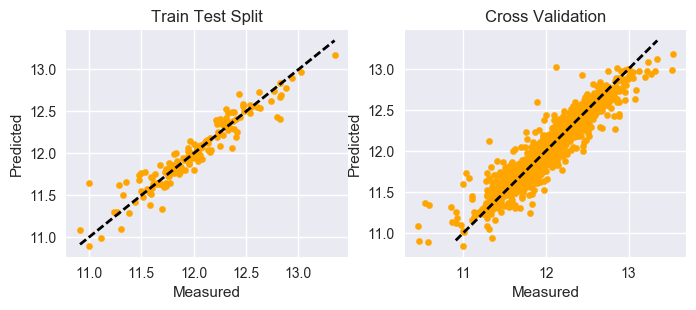

In [51]:
pnr = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', xgb.XGBRegressor(max_depth=10, n_estimators=200))])

pnr.fit(X_train, y_train);

pred1 = pnr.predict(X_test);
pred2 = cross_val_predict(pnr, df.drop('SalePrice', axis=1), df['SalePrice'], cv=5)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



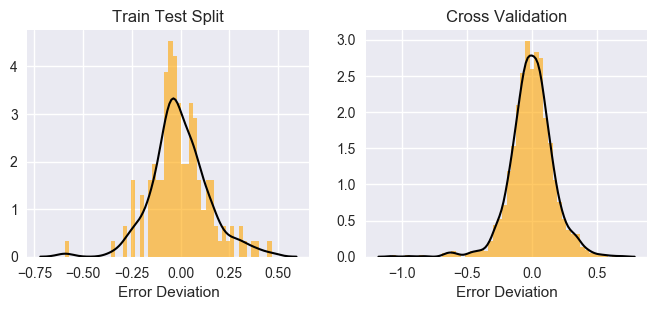

In [79]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [ ]:
param_grid = [{'alpha': [0.01, 0.1, 1, 10, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 500, 1000]}]

grid = GridSearchCV(pnr, param_grid, cv=10)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

# ElasticNet (L1 & L2 Regularization)

Linear regression, with a linear combination of L1 and L2 regularization terms. Overcomes limitations associated with only each term.

L1 isn't effective for high-dimensional data with few examples.

L2 makes the loss-function convex, with a unique minimum.

Train Test Split
MAE: 0.0971827827108
MSE: 0.0160312435669
RMSE: 0.126614547217


Cross Validation
MAE: 0.0928906631728
MSE: 0.0189417552263
RMSE: 0.137629049355


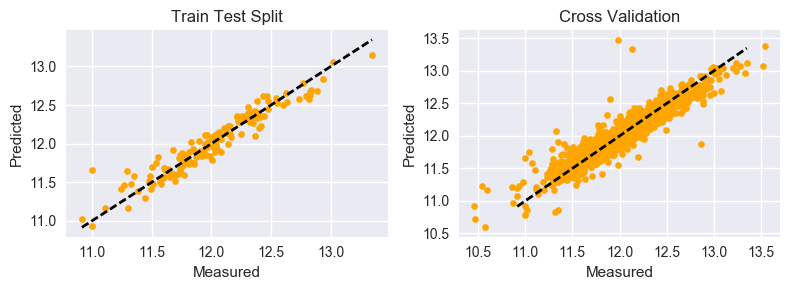

In [10]:
ela = ElasticNet(alpha=0.03, l1_ratio=0.1)
#ela = ElasticNetCV()

ela.fit(X_train, y_train);

pred1 = ela.predict(X_test);
#pred2 = cross_val_predict(ela, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(ela, scaled_train, df['SalePrice'], cv=10)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



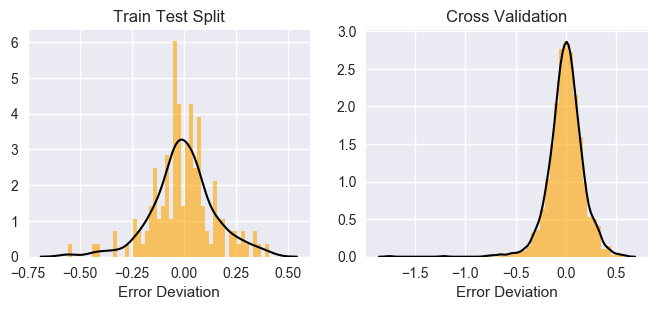

In [95]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [159]:
param_grid = [{'alpha': np.arange(0.01, 0.11, 0.01),
               'l1_ratio': [0.001, 0.01, 0.1, 1, 10]
              }]

grid = GridSearchCV(ela, param_grid, cv=10)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

[ 0.85981975  0.86134175  0.86882019  0.85596348  0.66820497  0.86163095
  0.86385403  0.87137477  0.82853362  0.47271232  0.86277181  0.86542037
  0.87156418  0.8068725   0.11954658  0.86356146  0.86653917  0.87079217
  0.79103277 -0.00840918  0.86408923  0.8673973   0.86932562  0.77330522
 -0.00840918  0.86447267  0.86794738  0.86739041  0.75387364 -0.00840918
  0.86473302  0.86827412  0.86503239  0.73322098 -0.00840918  0.86490961
  0.86846892  0.86224317  0.71096286 -0.00840918  0.86504332  0.86858861
  0.85906583  0.68803541 -0.00840918  0.86510596  0.8686266   0.85573407
  0.66386918 -0.00840918]


ElasticNet(alpha=0.029999999999999999, copy_X=True, fit_intercept=True,
      l1_ratio=0.1, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

ElasticNet picked 108 variables and eliminated the other 97 variables


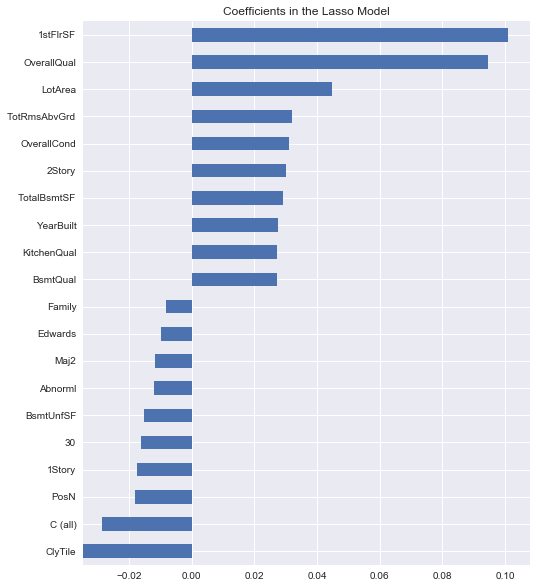

In [12]:
coef = pd.Series(ela.coef_, index = df.drop('SalePrice', axis=1).columns)

print("ElasticNet picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

# Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

Train Test Split
MAE: 0.124898429451
MSE: 0.0315424900015
RMSE: 0.177602055173


Cross Validation
MAE: 0.119960377083
MSE: 0.0282648005329
RMSE: 0.168121386304


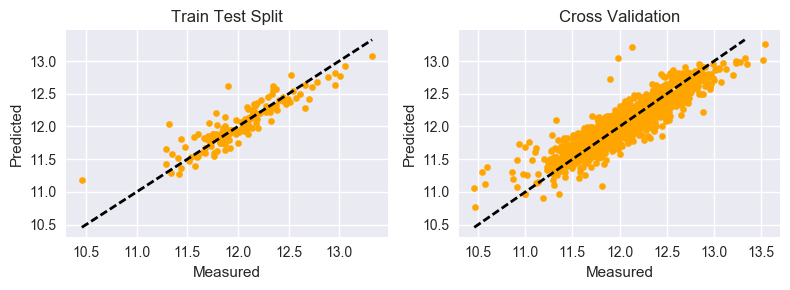

In [13]:
rfr = RandomForestRegressor(criterion='mse')

rfr.fit(X_train, y_train);

pred1 = rfr.predict(X_test);
#pred2 = cross_val_predict(ela, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(rfr, scaled_train, df['SalePrice'], cv=10)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



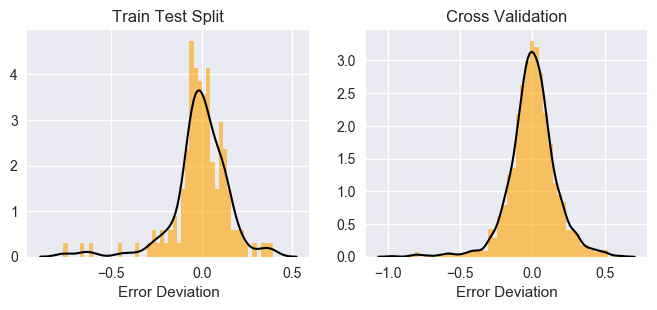

In [163]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [ ]:
param_grid = [{'n_estimators': [1, 5, 10, 20, 50, 100]
              }]

grid = GridSearchCV(rfr, param_grid, cv=10)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

# Gradient Boosting Regressor

Generalization of boosting to arbitrary differentiable loss functions.

Train Test Split
MAE: 0.0988271379945
MSE: 0.0181930299843
RMSE: 0.134881540562


Cross Validation
MAE: 0.0930997747883
MSE: 0.0180650811177
RMSE: 0.134406402815


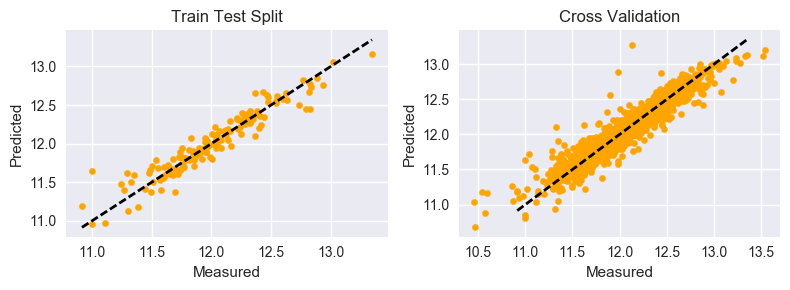

In [43]:
gbr = GradientBoostingRegressor(n_estimators=250);

gbr.fit(X_train, y_train);

pred1 = gbr.predict(X_test);
#pred2 = cross_val_predict(ela, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(gbr, scaled_train, df['SalePrice'], cv=10)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



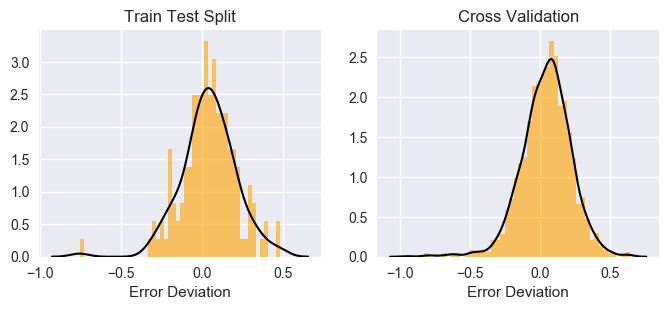

In [46]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

[ 0.81056206  0.85278471  0.86910457  0.87355083  0.87606993  0.87727844]


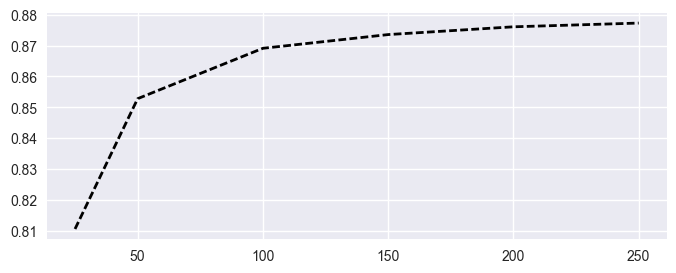

In [42]:
param_grid = [{'n_estimators': [25, 50, 100, 150, 200, 250]
              }]

grid = GridSearchCV(gbr, param_grid, cv=10)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

fig  = plt.figure(figsize=(6, 3), dpi=100);
axes1 = fig.add_subplot(111); 
axes1.plot(param_grid[0]['n_estimators'], grid.cv_results_['mean_test_score'], 'k--', lw=2)

# AdaBoost

Adaptive boosting of a decision tree regressor. A regressor is fit on the original data set. Additional copies of the regressor are then fit, with weights adjusted according to the error of the current prediciton.

Train Test Split
MAE: 0.135592615191
MSE: 0.0303314229703
RMSE: 0.17415918859


Cross Validation
MAE: 0.142596152947
MSE: 0.0332902139957
RMSE: 0.182456060452


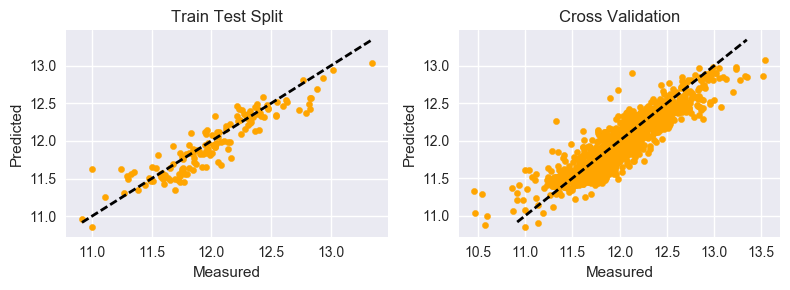

In [52]:
ada = AdaBoostRegressor(n_estimators=200);

ada.fit(X_train, y_train);

pred1 = ada.predict(X_test);
#pred2 = cross_val_predict(ada, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(ada, scaled_train, df['SalePrice'], cv=10)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



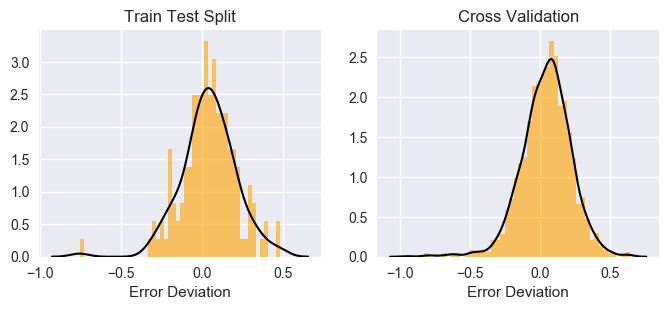

In [47]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

[ 0.81088586  0.85498981  0.86844065  0.87379505  0.87601368  0.8764839
  0.87743994  0.87968751  0.87878665  0.87870176  0.87840358]


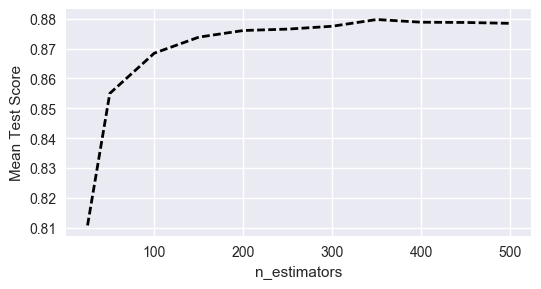

In [50]:
param_grid = [{'n_estimators': [25, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
              }]

grid = GridSearchCV(gbr, param_grid, cv=10)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

fig  = plt.figure(figsize=(6, 3), dpi=100);
axes1 = fig.add_subplot(111); 
axes1.plot(param_grid[0]['n_estimators'], grid.cv_results_['mean_test_score'], 'k--', lw=2)
axes1.set_xlabel('n_estimators')
axes1.set_ylabel('Mean Test Score')

# XGBoost

Gradient boosting, scalable to extremely large datasets.

Train Test Split
MAE: 0.102376905491
MSE: 0.018689090258
RMSE: 0.136708047525


Cross Validation
MAE: 0.0947363138861
MSE: 0.0181820282101
RMSE: 0.134840751296


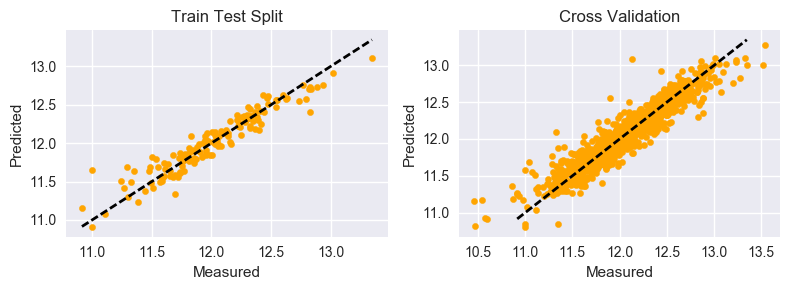

In [7]:
xgr = xgb.XGBRegressor(max_depth=10, n_estimators=200)

xgr.fit(X_train, y_train);

pred1 = xgr.predict(X_test);
#pred2 = cross_val_predict(ela, df.drop('SalePrice', axis=1), df['SalePrice'], cv=10)
pred2 = cross_val_predict(xgr, scaled_train, df['SalePrice'], cv=10)

fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes1.scatter(y_test, pred1, c='orange', s=20)
axes1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes1.set_title("Train Test Split")
axes1.set_xlabel('Measured')
axes1.set_ylabel('Predicted')

axes2 = fig.add_subplot(122); 
axes2.scatter(df['SalePrice'], pred2, c='orange', s=20)
axes2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes2.set_title("Cross Validation")
axes2.set_xlabel('Measured')
axes2.set_ylabel('Predicted')

fig.tight_layout();

print("Train Test Split")
print('MAE:',          mean_absolute_error(y_test, pred1))
print('MSE:',          mean_squared_error( y_test, pred1))
print('RMSE:', np.sqrt(mean_squared_error( y_test, pred1)))
print('\n')
print("Cross Validation")
print('MAE:',          mean_absolute_error(df['SalePrice'], pred2))
print('MSE:',          mean_squared_error( df['SalePrice'], pred2))
print('RMSE:', np.sqrt(mean_squared_error( df['SalePrice'], pred2)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



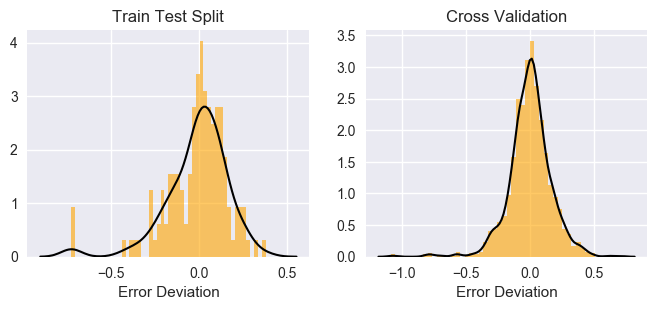

In [14]:
fig  = plt.figure(figsize=(8, 3), dpi=100);

axes1 = fig.add_subplot(121); 
axes2 = fig.add_subplot(122); 

sns.distplot((y_test-pred1),       bins=50, ax=axes1, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});
sns.distplot((df['SalePrice']-pred2), bins=50, ax=axes2, axlabel='Error Deviation', kde_kws={"color": "k", "lw": 1.5}, hist_kws={"linewidth": 3, "alpha": 0.6, "color": "orange"});

axes1.set_title("Train Test Split")
axes2.set_title("Cross Validation")

In [16]:
param_grid = [{'max_depth': [5, 10, 20],
               'learning_rate': [0.01, 0.1, 1],
               'n_estimators':  [50, 100, 200]
              }]

grid = GridSearchCV(xgr, param_grid, cv=10)

grid.fit(X_train, y_train)

print(grid.cv_results_['mean_test_score'])

grid.best_estimator_

[ 0.85881696  0.86529535  0.86947647]


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)